AI POWERED TASK MANAGEMENT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

In [2]:
# Download NLTK assets (only run once). Comment the code after running
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("synthetic_task_dataset_realistic.csv",index_col=0)
df.head()

,task_description,creation_date,due_date,priority,task_category,assigned_to,estimated_effort_hours,user_preferred_categories,user_current_workload
task_id,,,,,,,,,
1,Explore trends in tech.,2025-06-04,NaN,Medium,Research,Isaac,9,"Marketing, HR",2
2,Research Vision methods.,2025-05-19,2025-06-12,Low,Research,Chloe,7,"Research, Support",7
3,Analyze QQ4 campaign data.,2025-02-28,2025-03-30,High,Marketing,Grace,8,Marketing,0
4,Deploy v1.7 to production.,2025-03-19,2025-04-15,Medium,Development,David,2,Development,6
5,Schedule meeting with CTO.,2025-02-19,2025-03-17,High,Admin,Ivy,5,Admin,4


EDA

In [4]:
df.columns

Index(['task_description', 'creation_date', 'due_date', 'priority',
       'task_category', 'assigned_to', 'estimated_effort_hours',
       'user_preferred_categories', 'user_current_workload'],
      dtype='object')

In [5]:
df.dtypes

task_description             object
creation_date                object
due_date                     object
priority                     object
task_category                object
assigned_to                  object
estimated_effort_hours        int64
user_preferred_categories    object
user_current_workload         int64
dtype: object

In [6]:
df['creation_date'] = pd.to_datetime(df['creation_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

In [7]:
df.isnull().sum()

task_description               0
creation_date                  0
due_date                     610
priority                       0
task_category                  0
assigned_to                    0
estimated_effort_hours         0
user_preferred_categories      0
user_current_workload          0
dtype: int64

In [8]:
# Create deadline-based features
df['days_until_due'] = (df['due_date'] - df['creation_date']).dt.days
df['days_until_due'] = df['days_until_due'].fillna(-1)  # -1 = No due date

# Add binary indicator
df['has_due_date'] = df['due_date'].notnull().astype(int)

In [9]:
df.head()

,task_description,creation_date,due_date,priority,task_category,assigned_to,estimated_effort_hours,user_preferred_categories,user_current_workload,days_until_due,has_due_date
task_id,,,,,,,,,,,
1,Explore trends in tech.,2025-06-04,NaT,Medium,Research,Isaac,9,"Marketing, HR",2,-1.0,0
2,Research Vision methods.,2025-05-19,2025-06-12,Low,Research,Chloe,7,"Research, Support",7,24.0,1
3,Analyze QQ4 campaign data.,2025-02-28,2025-03-30,High,Marketing,Grace,8,Marketing,0,30.0,1
4,Deploy v1.7 to production.,2025-03-19,2025-04-15,Medium,Development,David,2,Development,6,27.0,1
5,Schedule meeting with CTO.,2025-02-19,2025-03-17,High,Admin,Ivy,5,Admin,4,26.0,1


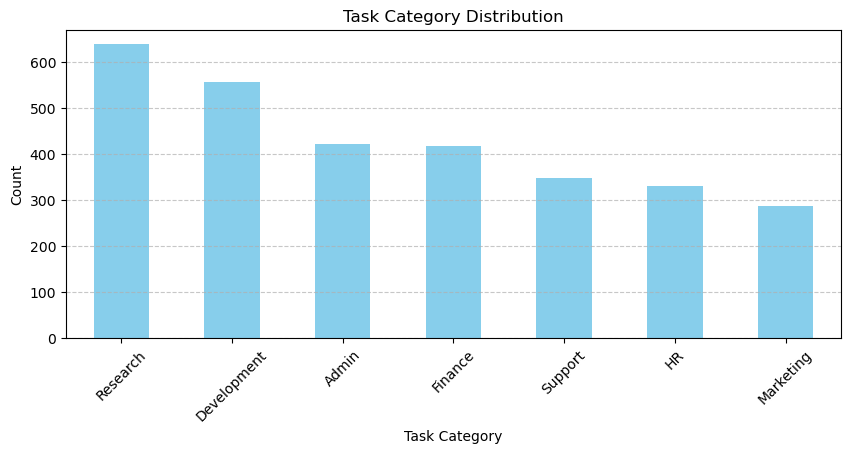

In [10]:
# Task Category Count Plot
df['task_category'].value_counts().plot(kind='bar', figsize=(10, 4), color='skyblue', title='Task Category Distribution')
plt.xlabel('Task Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

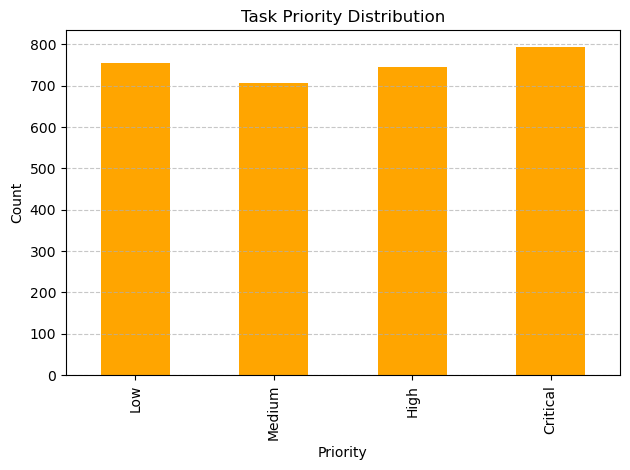

In [11]:

# Priority Count Plot
df['priority'].value_counts().loc[['Low', 'Medium', 'High', 'Critical']].plot(kind='bar', color='orange', title='Task Priority Distribution')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

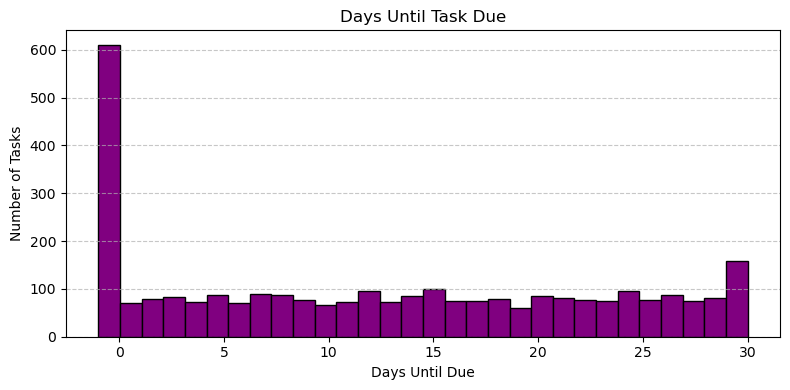

In [12]:
# Days Until Due Histogram
plt.figure(figsize=(8, 4))
plt.hist(df['days_until_due'], bins=30, color='purple', edgecolor='black')
plt.title('Days Until Task Due')
plt.xlabel('Days Until Due')
plt.ylabel('Number of Tasks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NLP Preprocessing

In [13]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
import re

# Initialize NLTK tools
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)
    filtered_tokens = [stemmer.stem(w) for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(filtered_tokens)

# Apply to your original DataFrame
df['processed_description'] = df['task_description'].apply(preprocess_text)

# Preview to ensure correctness
df[['task_description', 'processed_description']].head()




,task_description,processed_description
task_id,,
1,Explore trends in tech.,explor trend tech
2,Research Vision methods.,research vision method
3,Analyze QQ4 campaign data.,analyz qq campaign data
4,Deploy v1.7 to production.,deploy v product
5,Schedule meeting with CTO.,schedul meet cto


Week 2

In [14]:
# ML & NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

In [15]:
# Split raw text BEFORE vectorization
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['processed_description'], df['task_category'], test_size=0.2, random_state=42)

# TF-IDF on training only
vectorizer = TfidfVectorizer(max_features=3000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)


In [16]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


=== Naive Bayes ===
Accuracy: 0.9083333333333333
              precision    recall  f1-score   support

       Admin       0.93      0.91      0.92        87
 Development       0.91      0.90      0.90       109
     Finance       0.90      0.94      0.92        89
          HR       0.94      0.94      0.94        63
   Marketing       0.87      0.95      0.90        55
    Research       0.95      0.88      0.91       127
     Support       0.84      0.87      0.85        70

    accuracy                           0.91       600
   macro avg       0.90      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



In [17]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("=== SVM: Task Category Classification ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


=== SVM: Task Category Classification ===
Accuracy: 0.9083333333333333
              precision    recall  f1-score   support

       Admin       0.93      0.91      0.92        87
 Development       0.91      0.90      0.90       109
     Finance       1.00      0.94      0.97        89
          HR       0.88      0.94      0.91        63
   Marketing       0.79      0.96      0.87        55
    Research       1.00      0.87      0.93       127
     Support       0.78      0.87      0.82        70

    accuracy                           0.91       600
   macro avg       0.90      0.91      0.90       600
weighted avg       0.92      0.91      0.91       600



Week 3

In [18]:
def compute_priority(row):
    if row['has_due_date'] == 0:
        return 'Low'
    elif row['days_until_due'] <= 2 or row['user_current_workload'] >= 6:
        return 'Critical'
    elif row['estimated_effort_hours'] >= 10:
        return 'High'
    elif row['days_until_due'] <= 5:
        return 'Medium'
    else:
        return 'Low'

df['priority'] = df.apply(compute_priority, axis=1)
df['priority_encoded'] = df['priority'].map({'Low':0, 'Medium':1, 'High':2, 'Critical':3})


In [19]:
# TF-IDF features already vectorized
desc_tfidf = vectorizer.transform(df['processed_description'])

# Combine with numeric features
from scipy.sparse import hstack
numeric_features = df[['estimated_effort_hours', 'days_until_due', 'has_due_date', 'user_current_workload']].values
X_priority = hstack([desc_tfidf, numeric_features])
y_priority = df['priority_encoded']


In [20]:
from sklearn.model_selection import train_test_split

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_priority, y_priority, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_priority_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_priority_model.fit(X_train_p, y_train_p)
y_pred_priority = rf_priority_model.predict(X_test_p)

print("=== Random Forest: Priority Prediction ===")
print("Accuracy:", accuracy_score(y_test_p, y_pred_priority))
print(classification_report(y_test_p, y_pred_priority))


=== Random Forest: Priority Prediction ===
Accuracy: 0.9933333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       0.95      0.87      0.91        23
           2       1.00      1.00      1.00        84
           3       0.98      0.99      0.99       165

    accuracy                           0.99       600
   macro avg       0.98      0.97      0.97       600
weighted avg       0.99      0.99      0.99       600



In [22]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    use_label_encoder=False,
    objective='multi:softmax',  # Predict class labels directly
    eval_metric='mlogloss',
    num_class=4,  # REQUIRED if your labels are 0,1,2,3
    random_state=42
)
xgb_model.fit(X_train_p, y_train_p)
y_pred_xgb = xgb_model.predict(X_test_p)

print("XGBoost Accuracy:", accuracy_score(y_test_p, y_pred_xgb))
print(classification_report(y_test_p, y_pred_xgb))



XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00       165

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



c:\Users\rahul\miniconda3\envs\pyenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:03:49] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Workload balancing

In [23]:
from collections import defaultdict

# Rebuild USERS list from the dataset
USERS = df['assigned_to'].dropna().unique().tolist()

# If user profiles are not available from earlier, reconstruct them
user_profiles = {}
for user in USERS:
    # Use fallback preferred categories if not already available
    sample_categories = df[df['assigned_to'] == user]['task_category'].unique().tolist()
    user_profiles[user] = {
        'preferred_categories': sample_categories[:2] if sample_categories else ['Development', 'Admin'],
        'current_workload': 0  # start fresh
    }

# Set up workload tracker
user_workload = defaultdict(int)

# Assignment logic
def assign_user(row):
    category = row['task_category']
    effort = row['estimated_effort_hours']

    # Find users who prefer this category
    candidates = [user for user in USERS if category in user_profiles[user]['preferred_categories']]
    
    if not candidates:
        candidates = USERS

    # Select user with least workload
    best_user = min(candidates, key=lambda u: user_workload[u])
    user_workload[best_user] += effort  # simulate assignment
    return best_user

# Assign users to each task
df['assigned_by_logic'] = df.apply(assign_user, axis=1)


In [24]:
match_pct = (df['assigned_by_logic'] == df['assigned_to']).mean() * 100
print(f"Assignment logic matched {match_pct:.2f}% of original assignments.")


Assignment logic matched 5.80% of original assignments.


Hyper parameter tuning using GridsearchCV

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

# --- Naive Bayes: Use only non-negative TF-IDF features ---
num_tfidf_features = vectorizer.transform(["sample"]).shape[1]
X_train_tfidf = X_train[:, :num_tfidf_features]
X_test_tfidf = X_test[:, :num_tfidf_features]

# ----- GridSearchCV for Naive Bayes -----
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 1.5]
}

grid_nb = GridSearchCV(
    MultinomialNB(),
    param_grid=param_grid_nb,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
)

print("\n🔍 Running GridSearchCV for Naive Bayes...")
grid_nb.fit(X_train_tfidf, y_train)
best_nb = grid_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test_tfidf)

print("\n✅ Naive Bayes Results")
print("Best Params:", grid_nb.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"F1 (macro): {f1_score(y_test, y_pred_nb, average='macro'):.4f}")
print(classification_report(y_test, y_pred_nb, zero_division=0))

# ----- GridSearchCV for SVM -----
param_grid_svm = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000]
}

grid_svm = GridSearchCV(
    LinearSVC(random_state=42),
    param_grid=param_grid_svm,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
)

print("\n🔍 Running GridSearchCV for SVM...")
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("\n✅ SVM Results")
print("Best Params:", grid_svm.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"F1 (macro): {f1_score(y_test, y_pred_svm, average='macro'):.4f}")
print(classification_report(y_test, y_pred_svm, zero_division=0))



🔍 Running GridSearchCV for Naive Bayes...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

✅ Naive Bayes Results
Best Params: {'alpha': 1.0}
Accuracy: 0.9083
F1 (macro): 0.9076
              precision    recall  f1-score   support

       Admin       0.93      0.91      0.92        87
 Development       0.91      0.90      0.90       109
     Finance       0.90      0.94      0.92        89
          HR       0.94      0.94      0.94        63
   Marketing       0.87      0.95      0.90        55
    Research       0.95      0.88      0.91       127
     Support       0.84      0.87      0.85        70

    accuracy                           0.91       600
   macro avg       0.90      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600


🔍 Running GridSearchCV for SVM...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

✅ SVM Results
Best Params: {'C': 1, 'max_iter': 1000}
Accuracy: 0.9083
F1 (macro): 0.9038
              precision    

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

# ----- Parameter Grid for Random Forest -----
param_grid_rf = {
    'n_estimators': [100, 200],         # Number of trees
    'max_depth': [10, 20, None],        # Max depth of each tree
    'min_samples_leaf': [1, 2]          # Minimum samples at leaf
}

# ----- GridSearchCV Setup -----
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='f1_macro'  # Macro F1 for multi-class
)

print("\n🔍 Running GridSearchCV for Random Forest...")
grid_rf.fit(X_train, y_train)

# ----- Best Model & Evaluation -----
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\n✅ Random Forest Results")
print("Best Params:", grid_rf.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 (macro): {f1_score(y_test, y_pred_rf, average='macro'):.4f}")
print(classification_report(y_test, y_pred_rf, zero_division=0))



🔍 Running GridSearchCV for Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

✅ Random Forest Results
Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100}
Accuracy: 0.9200
F1 (macro): 0.9185
              precision    recall  f1-score   support

       Admin       1.00      0.91      0.95        87
 Development       1.00      0.90      0.95       109
     Finance       1.00      0.94      0.97        89
          HR       1.00      0.94      0.97        63
   Marketing       0.79      0.96      0.87        55
    Research       1.00      0.87      0.93       127
     Support       0.67      0.97      0.79        70

    accuracy                           0.92       600
   macro avg       0.92      0.93      0.92       600
weighted avg       0.94      0.92      0.92       600



Week 4

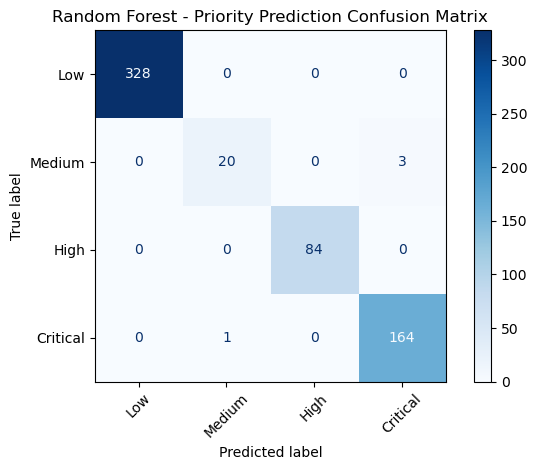

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot Confusion Matrix for Random Forest Priority Prediction
ConfusionMatrixDisplay.from_estimator(
    rf_priority_model,  # Use the correct model for priority prediction
    X_test_p,
    y_test_p,
    display_labels=['Low', 'Medium', 'High', 'Critical'],
    cmap='Blues',
    xticks_rotation=45
)
plt.title("Random Forest - Priority Prediction Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

In [28]:
from sklearn.metrics import accuracy_score

print("🔢 Model Accuracy Scores:")
print(f"Naive Bayes Accuracy     : {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"SVM Accuracy             : {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Random Forest Accuracy   : {accuracy_score(y_test, y_pred_rf):.4f}")


🔢 Model Accuracy Scores:
Naive Bayes Accuracy     : 0.9083
SVM Accuracy             : 0.9083
Random Forest Accuracy   : 0.9200


In [30]:
import joblib
# Save Naive Bayes model for classification
joblib.dump(nb_model, "nb_model.pkl")

# Save Random Forest model for priority prediction
joblib.dump(rf_priority_model, "rf_priority_model.pkl")

# Save TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']